In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')
# %matplotlib inline 
#makes plots fit the page

#plt.style.use('seaborn-deep')

In [2]:
your_numpy_array_gpu = np.asarray(['0.000 0.000 0.000 0.000 0.000 0.001 0.001 0.001 0.002 0.002 0.002 0.003 0.003 0.004 0.005 0.005 0.006 0.007 0.007 0.008 0.009 0.010 0.011 0.011 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.020 0.021 0.022 0.023 0.024 0.025 0.027 0.028 0.029 0.030 0.032 0.033 0.035 0.036 0.037 0.039 0.040 0.042 0.044 0.045 0.047 0.048 0.050 0.052 0.054 0.056 0.057 0.059 0.061 0.063 0.065 0.067 0.070 0.072 0.074 0.076 0.079 0.081 0.084 0.087 0.089 0.092 0.095 0.098 0.101 0.105 0.108 0.112 0.115 0.119 0.123 0.128 0.132 0.136 0.141 0.146 0.150 0.155 0.160 0.164 0.169 0.173 0.177 0.181 0.185 0.189 0.193 0.197 0.201 0.205 0.209 0.212 0.216 0.219 0.223 0.226 0.229 0.233 0.236 0.239 0.242 0.245 0.248 0.251 0.254 0.257 0.260 0.263 0.265 0.268 0.271 0.274 0.276 0.279 0.281 0.284 0.286 0.288 0.291 0.293 0.295 0.298 0.300 0.302 0.304 0.306 0.308 0.310 0.312 0.314 0.316 0.318 0.320 0.322 0.324 0.326 0.328 0.330 0.331 0.333 0.335 0.337 0.338 0.340 0.342 0.343 0.345 0.346 0.348 0.350 0.351 0.353 0.354 0.356 0.357 0.358 0.360 0.361 0.363 0.364 0.365 0.367 0.368 0.369 0.370 0.372 0.373 0.374 0.376 0.377 0.378 0.379 0.380 0.381 0.383 0.384 0.385 0.386 0.387 0.388 0.389 0.391 0.392 0.393 0.394 0.395 0.396 0.397 0.398 0.399 0.400 0.401 0.402 0.403 0.404 0.405 0.406 0.407 0.408 0.409 0.410 0.411 0.412 0.412 0.413 0.414 0.415 0.416 0.417 0.418 0.419 0.420 0.420 0.421 0.422 0.423 0.424 0.425 0.426 0.426 0.427 0.428 0.429 0.430 0.431 0.431 0.432 0.433 0.434 0.434 0.435 0.436 0.437 0.437 0.438 0.439 0.440 0.440 0.441 0.442 0.443 0.443 0.444 0.445 0.445 0.446 0.447 0.447 0.448 0.449 0.450 0.450 0.451 0.452 0.452 0.453 0.454 0.454 0.455 0.455 0.456 0.457 0.457 0.458 0.459 0.459 0.460 0.461 0.461 0.462 0.463 0.463 0.464 0.464 0.465 0.466 0.466 0.467 0.467 0.468 0.469 0.469 0.470 0.470 0.471 0.472 0.472 0.473 0.473 0.474 0.475 0.475 0.476 0.476 0.477 0.477 0.478 0.478 0.479 0.480 0.480 0.481 0.481 0.482 0.482 0.483 0.483 0.484 0.485 0.485 0.486 0.486 0.487 0.487 0.488 0.488 0.489 0.489 0.490 0.490 0.491 0.491 0.492 0.492 0.493 0.493 0.494 0.494 0.495 0.496 0.496 0.497 0.497 0.498 0.498 0.499 0.499 0.500 0.500 0.501 0.501 0.501 0.502 0.502 0.503 0.503 0.504 0.504 0.505 0.505 0.506 0.506 0.507 0.507 0.508 0.508 0.509 0.509 0.510 0.510 0.511 0.511 0.511 0.512 0.512 0.513 0.513 0.514 0.514 0.515 0.515 0.516 0.516 0.516 0.517 0.517 0.518 0.518 0.519 0.519 0.520 0.520 0.520 0.521 0.521 0.522 0.522 0.523 0.523'])
values_gpu = your_numpy_array_gpu.item().split(' ')
gpu_signal = np.asarray(values_gpu, dtype='double')

In [3]:
your_numpy_array_cpu = np.asarray(['0.000 0.000 0.000 0.000 0.000 0.001 0.001 0.002 0.002 0.003 0.003 0.004 0.004 0.005 0.006 0.007 0.008 0.009 0.010 0.011 0.012 0.013 0.014 0.016 0.017 0.018 0.019 0.021 0.022 0.024 0.025 0.027 0.029 0.030 0.032 0.034 0.035 0.037 0.039 0.041 0.043 0.045 0.047 0.049 0.051 0.054 0.056 0.058 0.061 0.063 0.066 0.068 0.071 0.073 0.076 0.079 0.082 0.085 0.088 0.091 0.095 0.098 0.102 0.105 0.109 0.113 0.117 0.121 0.126 0.131 0.135 0.140 0.146 0.151 0.157 0.163 0.170 0.177 0.184 0.192 0.200 0.210 0.219 0.230 0.240 0.251 0.263 0.274 0.285 0.296 0.307 0.317 0.327 0.337 0.346 0.355 0.364 0.373 0.381 0.390 0.398 0.406 0.413 0.421 0.428 0.435 0.442 0.448 0.455 0.461 0.467 0.473 0.479 0.484 0.490 0.495 0.500 0.506 0.510 0.515 0.520 0.525 0.529 0.533 0.537 0.542 0.546 0.549 0.553 0.557 0.561 0.564 0.567 0.571 0.574 0.577 0.580 0.583 0.586 0.589 0.592 0.595 0.597 0.600 0.602 0.605 0.607 0.610 0.612 0.614 0.616 0.618 0.621 0.623 0.625 0.626 0.628 0.630 0.632 0.634 0.635 0.637 0.639 0.640 0.642 0.644 0.645 0.647 0.648 0.649 0.651 0.652 0.653 0.655 0.656 0.657 0.658 0.660 0.661 0.662 0.663 0.664 0.665 0.666 0.667 0.668 0.669 0.670 0.671 0.672 0.673 0.674 0.675 0.676 0.677 0.678 0.678 0.679 0.680 0.681 0.682 0.682 0.683 0.684 0.685 0.685 0.686 0.687 0.687 0.688 0.689 0.689 0.690 0.691 0.691 0.692 0.693 0.693 0.694 0.694 0.695 0.696 0.696 0.697 0.697 0.698 0.698 0.699 0.699 0.700 0.700 0.701 0.701 0.702 0.702 0.703 0.703 0.704 0.704 0.705 0.705 0.706 0.706 0.707 0.707 0.708 0.708 0.708 0.709 0.709 0.710 0.710 0.711 0.711 0.711 0.712 0.712 0.713 0.713 0.713 0.714 0.714 0.714 0.715 0.715 0.716 0.716 0.716 0.717 0.717 0.717 0.718 0.718 0.719 0.719 0.719 0.720 0.720 0.720 0.721 0.721 0.721 0.722 0.722 0.722 0.723 0.723 0.723 0.724 0.724 0.724 0.725 0.725 0.725 0.726 0.726 0.726 0.726 0.727 0.727 0.727 0.728 0.728 0.728 0.729 0.729 0.729 0.730 0.730 0.730 0.730 0.731 0.731 0.731 0.732 0.732 0.732 0.732 0.733 0.733 0.733 0.734 0.734 0.734 0.734 0.735 0.735 0.735 0.736 0.736 0.736 0.736 0.737 0.737 0.737 0.737 0.738 0.738 0.738 0.739 0.739 0.739 0.739 0.740 0.740 0.740 0.740 0.741 0.741 0.741 0.741 0.742 0.742 0.742 0.743 0.743 0.743 0.743 0.744 0.744 0.744 0.744 0.745 0.745 0.745 0.745 0.746 0.746 0.746 0.746 0.747 0.747 0.747 0.747 0.748 0.748 0.748 0.748 0.749 0.749 0.749 0.749 0.750 0.750 0.750 0.750 0.750 0.751 0.751 0.751 0.751 0.752 0.752 0.752 0.752 0.753 0.753 0.753 0.753 0.754'])
values_cpu = your_numpy_array_cpu.item().split(' ')
cpu_signal = np.asarray(values_cpu, dtype='double')

In [4]:
n_iter = 4000
time_step_calc = 0.2
step_time_out = 10
time = np.linspace(start=0, stop= int (n_iter*time_step_calc - step_time_out*time_step_calc ), num= (int) (n_iter/step_time_out))

In [5]:
cpu_signal = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/cpu_signal_r=15.00_phi=0.00_z=0.10.txt')
cpu_signal_015 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/cpu_signal_r=15.00_phi=0.00_z=0.10_g015.txt')
cpu_signal_01 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/cpu_signal_r=15.00_phi=0.00_z=0.10_g01.txt')
cpu_signal_03 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/cpu_signal_r=15.00_phi=0.00_z=0.10_g03.txt')
cpu_signal_035 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/cpu_signal_r=15.00_phi=0.00_z=0.10_g035.txt')

gpu_signal = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/gpu_signal_r=15.00_phi=0.00_z=0.10.txt')
gpu_signal_ll_015 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_ll_g_015.txt')
gpu_signal_p_02 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g02.txt')
gpu_signal_p_015 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g015.txt')
gpu_signal_p_01 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g01.txt')
gpu_signal_p_03 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g03.txt')
gpu_signal_p_025 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g025.txt')
gpu_signal_p_035 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g035.txt')
gpu_signal_p_005 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g005.txt')

gpu_signal_fc = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/fc_gpu_signal_r=15.00_phi=0.00_z=0.10.txt')
cpu_signal_fc = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/cpu_numerical_convergence.txt')

In [6]:
gpu_signal_t_0p2 = np.loadtxt('/Users/kevinhbhimani/Desktop/GPU_work/test_waveforms/signal_r=15.00_phi=0.00_z=0.10_p_g02.txt')

In [7]:
thres=np.array([0.08,0.008,0.0008,0.00008, 0.000008, 0.000085, 0.00085, 0.0085, 0.085])
error_thres=np.array([0.391561,0.13241999999999998,0.0008709999999999551, 1.000000000001e-06,3.0000000000030003e-06, 1.000000000001e-06,0.0006359999999999699, 0.16579500000000003, 0.39046299999999995])
run_thres=np.array([32.475, 37.191, 87.216, 267.121,588.416,262.629, 82.800, 36.494, 32.474])

In [8]:
print("The deviation at a threshold of 0.0008 from numerical precision is 0.11%, and from corresponding CPU waveform is 0.6%")

The deviation at a threshold of 0.0008 from numerical precision is 0.11%, and from corresponding CPU waveform is 0.6%


Text(0.5, 1.0, 'Max residue from convergence at the numerical error level')

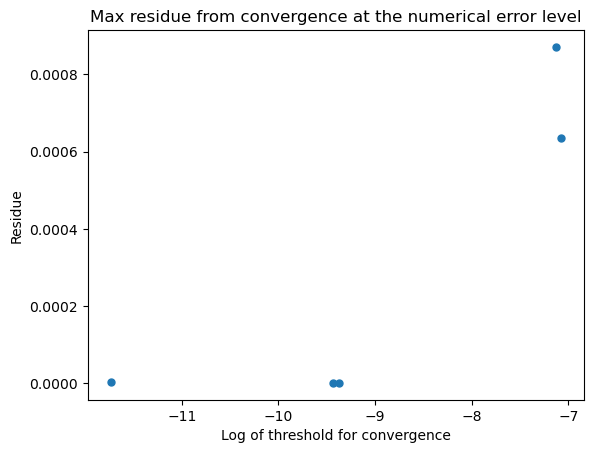

In [9]:
plt.plot(np.log(thres[error_thres<0.05]),error_thres[error_thres<0.05],'o',markersize=5,color='tab:blue')
plt.xlabel('Log of threshold for convergence')
plt.ylabel('Residue')
plt.title('Max residue from convergence at the numerical error level')

Text(0.5, 1.0, 'Run time for various convergence threshold')

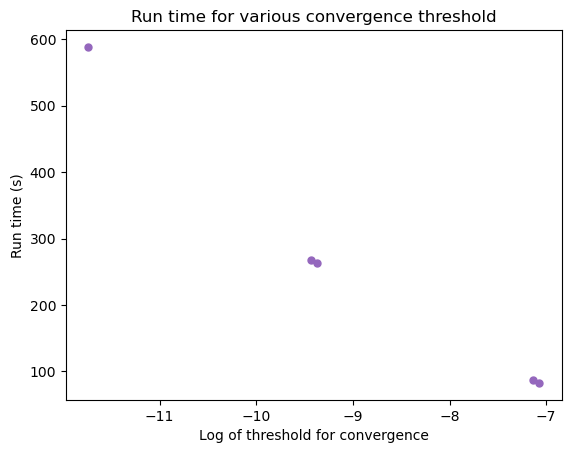

In [10]:
plt.plot(np.log(thres[error_thres<0.05]),run_thres[error_thres<0.05],'o',markersize=5,color='tab:purple')
plt.xlabel('Log of threshold for convergence')
plt.ylabel('Run time (s)')
plt.title('Run time for various convergence threshold')

Text(0.5, 1.0, 'Signal collected for various grid sizes, $r=15,z=0.10$, Energy=$5$MeV')

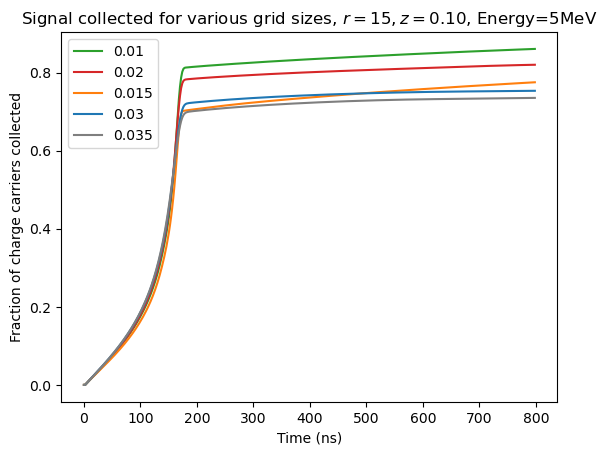

In [11]:
#plt.plot(time,gpu_signal_ll_015,'-',markersize=2,color='tab:green')
#plt.plot(time,gpu_signal_p_01,'-',markersize=2,color='tab:purple')
plt.plot(time,cpu_signal_01,'-',markersize=2,color='tab:green')
plt.plot(time,cpu_signal,'-',markersize=2,color='tab:red')
plt.plot(time,cpu_signal_015,'-',markersize=2,color='tab:orange')
plt.plot(time,cpu_signal_03,'-',markersize=2,color='tab:blue')
plt.plot(time,cpu_signal_035,'-',markersize=2,color='tab:grey')

plt.legend(['0.01', '0.02','0.015', '0.03', '0.035'])

plt.xlabel('Time (ns)')
plt.ylabel('Fraction of charge carriers collected')
plt.title('Signal collected for various grid sizes, $r=15,z=0.10$, Energy=$5$MeV')

Text(0.5, 1.0, 'Signal collected for various grid sizes, $r=15,z=0.10$, Energy=$5$MeV')

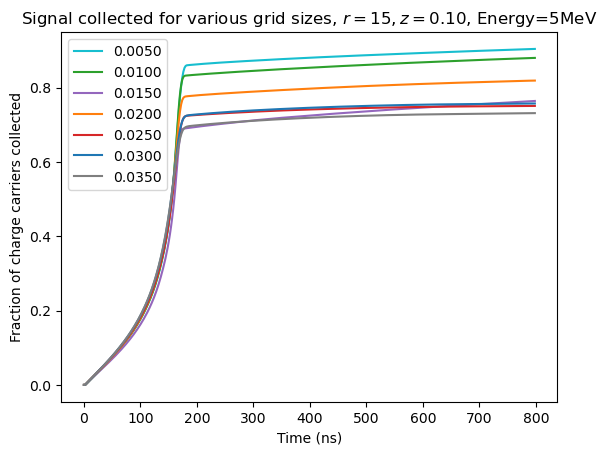

In [12]:
plt.plot(time,gpu_signal_p_005,'-',markersize=2,color='tab:cyan')
plt.plot(time,gpu_signal_p_01,'-',markersize=2,color='tab:green')
plt.plot(time,gpu_signal_p_015,'-',markersize=2,color='tab:purple')
plt.plot(time,gpu_signal_p_02,'-',markersize=2,color='tab:orange')
plt.plot(time,gpu_signal_p_025,'-',markersize=2,color='tab:red')
plt.plot(time,gpu_signal_p_03,'-',markersize=2,color='tab:blue')
plt.plot(time,gpu_signal_p_035,'-',markersize=2,color='tab:gray')
plt.legend(['0.0050', '0.0100', '0.0150', '0.0200', '0.0250', '0.0300', '0.0350'])

plt.xlabel('Time (ns)')
plt.ylabel('Fraction of charge carriers collected')
plt.title('Signal collected for various grid sizes, $r=15,z=0.10$, Energy=$5$MeV')

In [13]:
np.max(cpu_signal_03-gpu_signal_p_03)

0.0

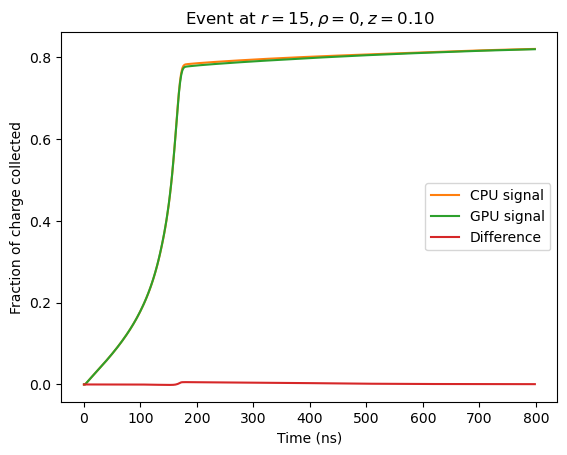

In [14]:
plt.plot(time,cpu_signal,'-',markersize=2,color='tab:orange')
plt.plot(time,gpu_signal_p_02,'-',markersize=2,color='tab:green')
plt.plot(time,cpu_signal-gpu_signal_p_02,'-',markersize=2,color='tab:red')

plt.xlabel('Time (ns)')
plt.ylabel('Fraction of charge collected')
plt.legend(['CPU signal', 'GPU signal', 'Difference'])
plt.title('Event at $r=15,\\rho=0,z=0.10$')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/cpu_gpu_wf.png')

plt.show()

In [15]:
#np.max(cpu_signal_fc-gpu_signal_fc)
np.max(gpu_signal-gpu_signal_p_02)

9.999999999177334e-07

Text(0.5, 1.0, 'CPU signal - GPU signal, at numerical convergence \n $r=15, z=0.10$, Energy=$5$MeV')

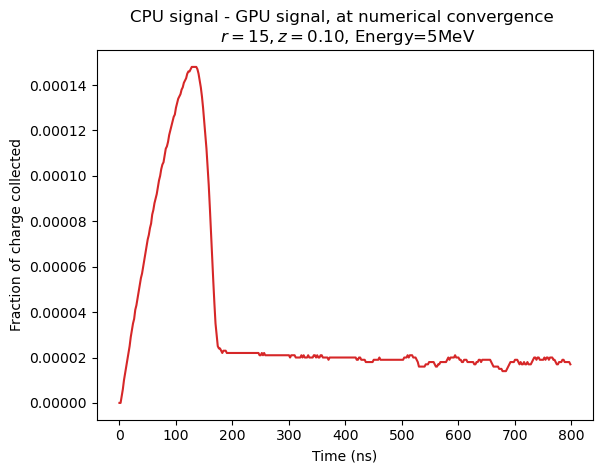

In [16]:
#np.max(cpu_signal_r15_z_p10-gpu_signal_fc)
plt.plot(time, cpu_signal_fc-gpu_signal_fc,'-',markersize=2,color='tab:red')
plt.xlabel('Time (ns)')
plt.ylabel('Fraction of charge collected')
plt.title('CPU signal - GPU signal, at numerical convergence \n $r=15, z=0.10$, Energy=$5$MeV')


In [17]:
print('Error at numerical convergence for both CPU and GPU is ', np.max(cpu_signal_fc-gpu_signal_fc)*100/np.max(cpu_signal_fc[cpu_signal_fc-gpu_signal_fc == np.max(cpu_signal_fc-gpu_signal_fc)]),'%')

Error at numerical convergence for both CPU and GPU is  0.04508195472918279 %


Text(0.5, 1.0, 'GPU signal - GPU signal, coarse convergence - numerical convergence level')

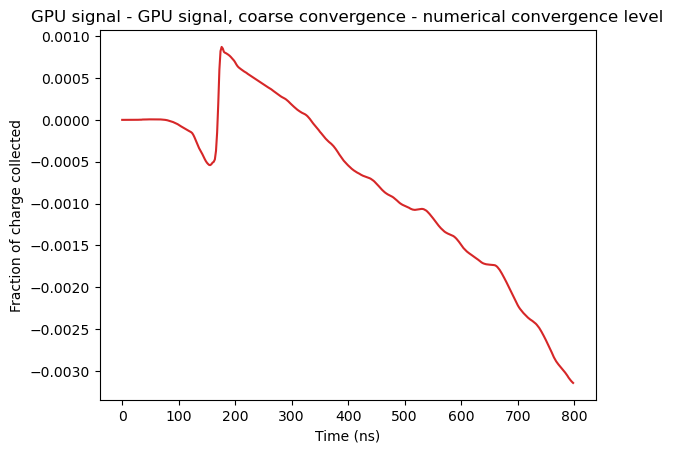

In [18]:
plt.plot(time, gpu_signal_fc-gpu_signal,'-',markersize=2,color='tab:red')
plt.xlabel('Time (ns)')
plt.ylabel('Fraction of charge collected')
plt.title('GPU signal - GPU signal, coarse convergence - numerical convergence level')

In [19]:
(np.max(cpu_signal_fc-gpu_signal_fc) - np.max(cpu_signal-gpu_signal))/ cpu_signal_fc[np.argmax(cpu_signal_fc-gpu_signal_fc)]

-0.01961740408601715

In [20]:
grid =np.array([0.013,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,0.055,0.060,0.065,0.070,0.075,0.080,0.085,0.090,0.095,0.100])

In [21]:
cpu_time =np.array([403.160000,287.720000,172.930000,125.690000,102.940000,81.790000,86.280000,67.020000,47.390000,23.080000,24.350000,26.520000,18.160000,17.200000,14.150000,12.020000,10.090000,8.560000,6.080000])

In [22]:
gpu_time = np.array([4.010000,3.210000,1.730000,1.340000,1.080000,0.980000,0.780000,0.650000,0.560000,0.500000,0.480000,0.470000,0.420000,0.410000,0.400000,0.370000,0.370000,0.360000,0.350000])

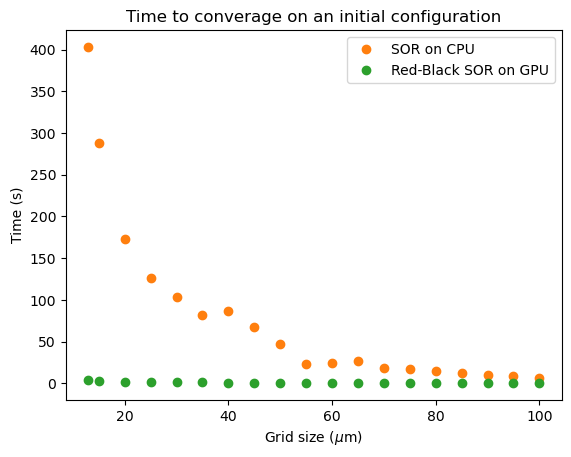

In [34]:
plt.plot(grid*1000,cpu_time,'o', color='tab:orange')
plt.plot(grid*1000,gpu_time,'o', color='tab:green')
plt.xlabel('Grid size ($\mu$m)')
plt.ylabel('Time (s)')
plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Time to converage on an initial configuration')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')

plt.show()

In [24]:
max_dif = np.max(cpu_signal-gpu_signal_p_02)

In [25]:
cpu_answer = np.min(cpu_signal[cpu_signal-gpu_signal_p_02 == np.max(cpu_signal-gpu_signal_p_02)])

In [26]:
print("Biggest difference is", max_dif/cpu_answer *100, "%")

Biggest difference is 0.7295047558590799 %


In [27]:
time_full_program_cpu = np.array([24642, 17291, 6648, 2359, 1219, 1052, 972, 562, 278, 293, 240])
time_full_program_gpu = np.array([394, 189, 86, 49, 33, 24, 17, 14, 11, 9, 8])
grid_full_program = np.array([0.010, 0.015, 0.020,0.025,0.030,0.035,0.040,0.045,0.050, 0.055, 0.0600])

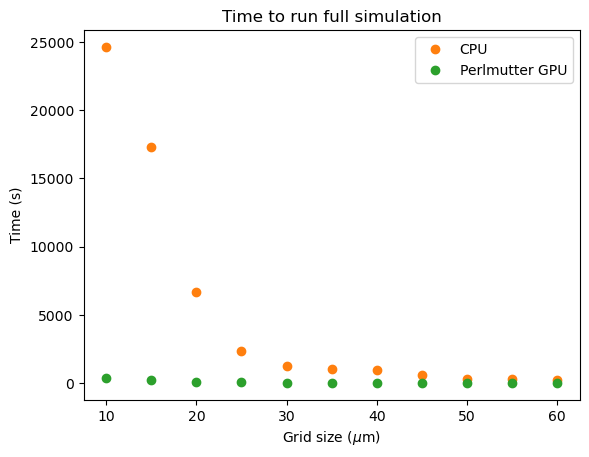

In [36]:
plt.plot(grid_full_program*1000,time_full_program_cpu,'o', color='tab:orange')
plt.plot(grid_full_program*1000,time_full_program_gpu,'o', color='tab:green')

plt.xlabel('Grid size ($\mu$m)')
plt.ylabel('Time (s)')
plt.legend(['CPU','Perlmutter GPU'])
plt.title('Time to run full simulation')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/GPU_run_time.png')
plt.show()


In [29]:
24642/394

62.54314720812183

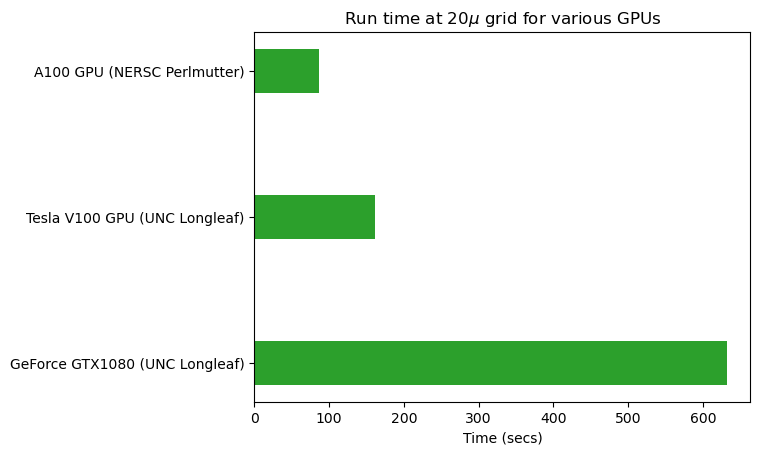

In [30]:
# machine = [ 'CPU (longleaf)','GeForce GTX1080', 'Tesla V100 GPU (Longleaf)', 'A100 GPU (Perlmutter)']
# run_time = [6648,632, 161,86]

machine = ['GeForce GTX1080 (UNC Longleaf)', 'Tesla V100 GPU (UNC Longleaf)', 'A100 GPU (NERSC Perlmutter)']
run_time = [632, 161,86]

plt.barh(machine,run_time, height=0.3, color='tab:green')
plt.title('Run time at 20$\mu$ grid for various GPUs')
#plt.ylabel('Product')
plt.xlabel('Time (secs)')

#plt.figure(figsize=(5,1))
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/GPU_comp.png')

plt.show()

# plt.rcdefaults()
# fig, ax = plt.subplots()
# ax.barh(machine, run_time)
# #ax.set_yticks(y_pos, labels=people)
# ax.invert_yaxis()  # labels read top-to-bottom
# plt.show()
